In [1]:
import sympy as sym
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# Set font size of plot elements\n",
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## 2 Level Case
We want to start with sysem with levels $|1\rangle$ and $|2\rangle$ to confirm that sympy is able to symbolically calculate the bloch equations.  We'll consider that we have a laser with frequency $\omega_L$ interacting with the atom and that the frequency associated with the transition is $\omega_{21} = \omega_2 - \omega_1$.

In [3]:
# Start by defining our symbols
ω1, ω2, Ω12, Ω21, p11, p12, p21, p22 = sym.symbols("ω_1, ω_2, Ω_1_2, Ω_2_1, p_1_1, p_1_2, p_2_1, p_2_2")

In [4]:
# Define the Hamiltonian under the RWA and with zero detuning between the laser and transition
H = sym.Matrix([[ω1, Ω12], [Ω21, ω2]])

# Define the density matrix
ρ = sym.Matrix([[p11, p12], [p21, 1-p11]])

In [5]:
# Define the damping rate
γ12 = sym.symbols("γ_1_2")

# Definet the jump operator
σ12 = sym.Matrix([[0, 1], [0, 0]])

In [6]:
# Define the master equation
dρ = -1j * (H @ ρ - ρ @ H) + γ12 * (σ12 @ ρ @ σ12.H - 0.5 * (σ12.H @ σ12 @ ρ + ρ @ σ12.H @ σ12))
dρ

Matrix([
[                            γ_1_2*(1 - p_1_1) - 1.0*I*(-p_1_2*Ω_2_1 + p_2_1*Ω_1_2), -0.5*p_1_2*γ_1_2 - 1.0*I*(-p_1_1*Ω_1_2 + p_1_2*ω_1 - p_1_2*ω_2 + Ω_1_2*(1 - p_1_1))],
[-0.5*p_2_1*γ_1_2 - 1.0*I*(p_1_1*Ω_2_1 - p_2_1*ω_1 + p_2_1*ω_2 - Ω_2_1*(1 - p_1_1)),                         γ_1_2*(1.0*p_1_1 - 1.0) - 1.0*I*(p_1_2*Ω_2_1 - p_2_1*Ω_1_2)]])

In [7]:
eigs = dρ.diagonalize()
print(eigs)

(Matrix([
[(2.0*I*p_1_1*γ_1_2 + 2.0*p_1_2*Ω_2_1 - 2.0*p_2_1*Ω_1_2 - 2.0*I*γ_1_2 + 4.0*I*(p_1_1**2*Ω_1_2*Ω_2_1 + 0.25*p_1_1**2*γ_1_2**2 - 0.25*I*p_1_1*p_1_2*Ω_2_1*γ_1_2 - 0.5*p_1_1*p_1_2*Ω_2_1*ω_1 + 0.5*p_1_1*p_1_2*Ω_2_1*ω_2 + 0.25*I*p_1_1*p_2_1*Ω_1_2*γ_1_2 - 0.5*p_1_1*p_2_1*Ω_1_2*ω_1 + 0.5*p_1_1*p_2_1*Ω_1_2*ω_2 - p_1_1*Ω_1_2*Ω_2_1 - 0.5*p_1_1*γ_1_2**2 - 0.25*p_1_2**2*Ω_2_1**2 + 0.5*p_1_2*p_2_1*Ω_1_2*Ω_2_1 + 0.0625*p_1_2*p_2_1*γ_1_2**2 + 0.25*p_1_2*p_2_1*ω_1**2 - 0.5*p_1_2*p_2_1*ω_1*ω_2 + 0.25*p_1_2*p_2_1*ω_2**2 + 0.375*I*p_1_2*Ω_2_1*γ_1_2 + 0.25*p_1_2*Ω_2_1*ω_1 - 0.25*p_1_2*Ω_2_1*ω_2 - 0.25*p_2_1**2*Ω_1_2**2 - 0.375*I*p_2_1*Ω_1_2*γ_1_2 + 0.25*p_2_1*Ω_1_2*ω_1 - 0.25*p_2_1*Ω_1_2*ω_2 + 0.25*Ω_1_2*Ω_2_1 + 0.25*γ_1_2**2)**0.5)/(-4.0*p_1_1*Ω_2_1 + I*p_2_1*γ_1_2 + 2.0*p_2_1*ω_1 - 2.0*p_2_1*ω_2 + 2.0*Ω_2_1), (2.0*I*p_1_1*γ_1_2 + 2.0*p_1_2*Ω_2_1 - 2.0*p_2_1*Ω_1_2 - 2.0*I*γ_1_2 - 4.0*I*(p_1_1**2*Ω_1_2*Ω_2_1 + 0.25*p_1_1**2*γ_1_2**2 - 0.25*I*p_1_1*p_1_2*Ω_2_1*γ_1_2 - 0.5*p_1_1*p_1_2*Ω_2_1*ω_1 + 0

In [8]:
dρ_vec = dρ.reshape(4, 1)
dρ_vec

Matrix([
[                             γ_1_2*(1 - p_1_1) - 1.0*I*(-p_1_2*Ω_2_1 + p_2_1*Ω_1_2)],
[-0.5*p_1_2*γ_1_2 - 1.0*I*(-p_1_1*Ω_1_2 + p_1_2*ω_1 - p_1_2*ω_2 + Ω_1_2*(1 - p_1_1))],
[ -0.5*p_2_1*γ_1_2 - 1.0*I*(p_1_1*Ω_2_1 - p_2_1*ω_1 + p_2_1*ω_2 - Ω_2_1*(1 - p_1_1))],
[                        γ_1_2*(1.0*p_1_1 - 1.0) - 1.0*I*(p_1_2*Ω_2_1 - p_2_1*Ω_1_2)]])

In [9]:
# Now try to solve for the steady state
res = sym.solve(dρ_vec, [p11, p12, p21, p22])
res

{p_1_1: (4.0*Ω_1_2*Ω_2_1 + γ_1_2**2 + 4.0*ω_1**2 - 8.0*ω_1*ω_2 + 4.0*ω_2**2)/(8.0*Ω_1_2*Ω_2_1 + γ_1_2**2 + 4.0*ω_1**2 - 8.0*ω_1*ω_2 + 4.0*ω_2**2),
 p_1_2: (2.0*I*Ω_1_2*γ_1_2 + 4.0*Ω_1_2*ω_1 - 4.0*Ω_1_2*ω_2)/(8.0*Ω_1_2*Ω_2_1 + γ_1_2**2 + 4.0*ω_1**2 - 8.0*ω_1*ω_2 + 4.0*ω_2**2),
 p_2_1: (-2.0*I*Ω_2_1*γ_1_2 + 4.0*Ω_2_1*ω_1 - 4.0*Ω_2_1*ω_2)/(8.0*Ω_1_2*Ω_2_1 + γ_1_2**2 + 4.0*ω_1**2 - 8.0*ω_1*ω_2 + 4.0*ω_2**2)}

In [10]:
# We can now print the solutions
res[p11]

(4.0*Ω_1_2*Ω_2_1 + γ_1_2**2 + 4.0*ω_1**2 - 8.0*ω_1*ω_2 + 4.0*ω_2**2)/(8.0*Ω_1_2*Ω_2_1 + γ_1_2**2 + 4.0*ω_1**2 - 8.0*ω_1*ω_2 + 4.0*ω_2**2)

In [11]:
res[p12]

(2.0*I*Ω_1_2*γ_1_2 + 4.0*Ω_1_2*ω_1 - 4.0*Ω_1_2*ω_2)/(8.0*Ω_1_2*Ω_2_1 + γ_1_2**2 + 4.0*ω_1**2 - 8.0*ω_1*ω_2 + 4.0*ω_2**2)

In [12]:
res[p21]

(-2.0*I*Ω_2_1*γ_1_2 + 4.0*Ω_2_1*ω_1 - 4.0*Ω_2_1*ω_2)/(8.0*Ω_1_2*Ω_2_1 + γ_1_2**2 + 4.0*ω_1**2 - 8.0*ω_1*ω_2 + 4.0*ω_2**2)

Interestingly, it seems that the only way to reach the steady state solution is to have a non-zero population in the excited state.  Also worth noting that it provides no solution for p22.  I might have missed something in setting up the system

In [13]:
# We can also turn the symbolic expressions into numerical ones using lambdify
dp_rhs = sym.lambdify([p11, p12, p21, p22, ω1, ω2, Ω12, Ω21, γ12], dρ_vec)

In [14]:
# Then we can use the Euler method to get an approximate solution to the derivative
# Define time range
t, dt = np.linspace(0, 1, 100, retstep=True)

# Define starting parameters - we'll assume we start entirely in the ground state
p11_iv = 1
p12_iv, p21_iv, p22_iv = 0, 0, 0
ω1_val = 10
ω2_val = 15
γ12_val = 5
Ω12_val = 10
Ω21_val = Ω12_val

In [15]:
# Now apply Euler method
p_vals = np.zeros((t.shape[0], 4, 1), dtype=complex)
p_curr = np.array([[p11_iv], [p12_iv], [p21_iv], [p22_iv]], dtype=complex)
for i in range(t.shape[0]):
    p_vals[i] = p_curr
    p_next = p_curr + dt * dp_rhs(p_vals[i, 0, 0], p_vals[i, 1, 0], p_vals[i, 2, 0], p_vals[i, 3, 0], ω1_val, ω2_val, Ω12_val, Ω21_val, γ12_val)
    p_curr = p_next

/home/jacob/anaconda3/envs/mode_cooling/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jacob/anaconda3/envs/mode_cooling/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


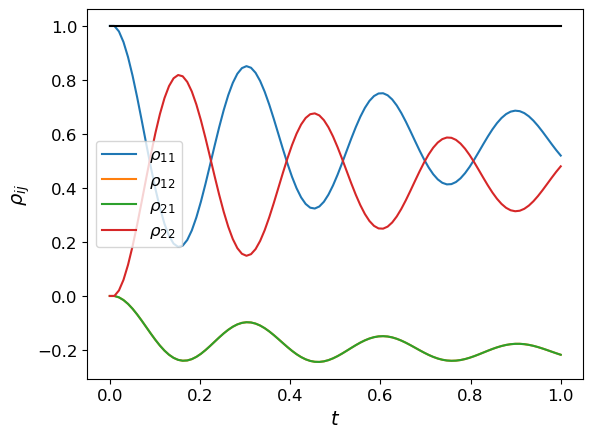

In [16]:
plt.plot(t, p_vals.T[0, 0], label='$\\rho_{11}$')
plt.plot(t, p_vals.T[0, 1], label='$\\rho_{12}$')
plt.plot(t, p_vals.T[0, 2], label='$\\rho_{21}$')
plt.plot(t, p_vals.T[0, 3], label='$\\rho_{22}$')
plt.plot(t, p_vals.T[0, 0]+p_vals.T[0, 3], color='k')
plt.xlabel("$t$")
plt.ylabel("$\\rho_{ij}$")
plt.legend()
plt.savefig("two_level_example_evol.png", format='png', dpi=300)

We want to try working with the vectorized master equation to see if we can obtain the steady state solution numerically.

In [17]:
# Define identity matrix
iden = sym.eye(2)

# Define 'vectorized' version of liouvillian
A = γ12 * sym.tensorproduct(σ12, σ12.conjugate())
B = γ12 / 2 * (sym.tensorproduct(σ12.H @ σ12, iden) + sym.tensorproduct(iden, (σ12.H @ σ12).T))
L = -1j * (sym.tensorproduct(H, iden) - sym.tensorproduct(iden, H.T)) + A - B

In [18]:
L

[[[[0, 1.0*I*Ω_2_1], [1.0*I*Ω_1_2, -γ_1_2/2 - 1.0*I*(ω_1 - ω_2)]], [[-1.0*I*Ω_1_2, γ_1_2], [0, -1.0*I*Ω_1_2]]], [[[-1.0*I*Ω_2_1, 0], [0, -1.0*I*Ω_2_1]], [[-γ_1_2/2 - 1.0*I*(-ω_1 + ω_2), 1.0*I*Ω_2_1], [1.0*I*Ω_1_2, -γ_1_2]]]]

In [25]:
dum = sym.permutedims(L, (1, 0, 2, 3))

In [26]:
dum

[[[[0, 1.0*I*Ω_2_1], [1.0*I*Ω_1_2, -γ_1_2/2 - 1.0*I*(ω_1 - ω_2)]], [[-1.0*I*Ω_2_1, 0], [0, -1.0*I*Ω_2_1]]], [[[-1.0*I*Ω_1_2, γ_1_2], [0, -1.0*I*Ω_1_2]], [[-γ_1_2/2 - 1.0*I*(-ω_1 + ω_2), 1.0*I*Ω_2_1], [1.0*I*Ω_1_2, -γ_1_2]]]]

In [36]:
test = []
for i in range(2):
    for j in range(2):
        temp = []
        for k in range(2):
            for l in range(2):
                temp.append(dum[k][i][j][l])
        test.append(temp)
m = sym.Matrix(test)
a = m @ ρ.reshape(4, 1)
a

Matrix([
[                           1.0*I*p_1_2*Ω_2_1 - 1.0*I*p_2_1*Ω_1_2 + γ_1_2*(1 - p_1_1)],
[  1.0*I*p_1_1*Ω_1_2 + p_1_2*(-γ_1_2/2 - 1.0*I*(ω_1 - ω_2)) - 1.0*I*Ω_1_2*(1 - p_1_1)],
[-1.0*I*p_1_1*Ω_2_1 + p_2_1*(-γ_1_2/2 - 1.0*I*(-ω_1 + ω_2)) + 1.0*I*Ω_2_1*(1 - p_1_1)],
[                          -1.0*I*p_1_2*Ω_2_1 + 1.0*I*p_2_1*Ω_1_2 - γ_1_2*(1 - p_1_1)]])

In [37]:
b = dρ.reshape(4, 1)
b

Matrix([
[                             γ_1_2*(1 - p_1_1) - 1.0*I*(-p_1_2*Ω_2_1 + p_2_1*Ω_1_2)],
[-0.5*p_1_2*γ_1_2 - 1.0*I*(-p_1_1*Ω_1_2 + p_1_2*ω_1 - p_1_2*ω_2 + Ω_1_2*(1 - p_1_1))],
[ -0.5*p_2_1*γ_1_2 - 1.0*I*(p_1_1*Ω_2_1 - p_2_1*ω_1 + p_2_1*ω_2 - Ω_2_1*(1 - p_1_1))],
[                        γ_1_2*(1.0*p_1_1 - 1.0) - 1.0*I*(p_1_2*Ω_2_1 - p_2_1*Ω_1_2)]])

In [29]:
sym.simplify(a - b)

Matrix([
[0],
[0],
[0],
[0]])

In [34]:
# Now diagonalize m
m_fun = sym.lambdify([p11, p12, p21, p22, ω1, ω2, Ω12, Ω21, γ12], m)

m_val = m_fun(1, 0, 0, 0, ω1_val, ω2_val, Ω12_val, Ω21_val, γ12_val)
eigs = np.linalg.eig(m_val)
eigs

EigResult(eigenvalues=array([-3.67641063e+00-2.05735212e+01j, -3.67641063e+00+2.05735212e+01j,
       -4.20167474e-16-1.62554081e-18j, -2.64717874e+00+1.29414015e-16j]), eigenvectors=array([[ 0.48368087-3.65368443e-02j,  0.48368087+3.65368443e-02j,
         0.71734633+0.00000000e+00j, -0.17149421+5.04806060e-03j],
       [-0.37877983+1.11496679e-02j,  0.62115801+0.00000000e+00j,
        -0.27327479+1.36637397e-01j,  0.68597686+0.00000000e+00j],
       [ 0.62115801+0.00000000e+00j, -0.37877983-1.11496679e-02j,
        -0.27327479-1.36637397e-01j,  0.68478914-4.03495234e-02j],
       [-0.48368087+3.65368443e-02j, -0.48368087-3.65368443e-02j,
         0.54654959+1.00943006e-16j,  0.17149421-5.04806060e-03j]]))

In [44]:
eigs[0][2], eigs[1][:, 2]

((-4.201674743532709e-16-1.6255408057314424e-18j),
 array([ 0.71734633+0.00000000e+00j, -0.27327479+1.36637397e-01j,
        -0.27327479-1.36637397e-01j,  0.54654959+1.00943006e-16j]))

In [47]:
m_val @ eigs[1][:, 2] 

array([-6.66133815e-16+4.44089210e-16j,  4.54318546e-16-1.77635684e-15j,
       -5.65340849e-16+8.88178420e-16j,  6.66133815e-16-4.44089210e-16j])

## 3 Level Case
Now we'll move on to considering a 3 level system in the same fashion.  In this case, the atom has levels $|1\rangle, |2\rangle, |3\rangle$ with frequencies $\omega_1, \omega_2, \omega_3$ respectively.  We consider having two lasers.  One laser incoherently drives the $|1\rangle$ and $|2\rangle$ transition with frequency $\omega_{L1}$ and the other incoherently drives the $|2\rangle$ and $|3\rangle$ transition with frequency $\omega_{L2}$.

In [69]:
# Start by defining our symbols
ω1, ω2, ω3, Ω12, Ω21, Ω23, Ω32 = sym.symbols("ω_1, ω_2, ω_3, Ω_1_2, Ω_2_1, Ω_2_3, Ω_3_2")
h_sym_list = [ω1, ω2, ω3, Ω12, Ω21, Ω23, Ω32]
p11, p12, p13, p21, p22, p23, p31, p32, p33 = sym.symbols("p_1_1, p_1_2, p_1_3, p_2_1, p_2_2, p_2_3, p_3_1, p_3_2, p_3_3")
p_sym_list = [p11, p12, p13, p21, p22, p23, p31, p32, p33]

In [70]:
# Define the Hamiltonian under the RWA and with zero detuning between the laser and transition
H = sym.Matrix([[ω1, Ω12, 0], [Ω21, ω2, Ω23], [0, Ω32, ω3]])

# Define the density matrix
ρ = sym.Matrix([[p11, p12, p13], [p21, p22, p23], [p31, p32, 1 - p11 - p22]])

In [71]:
ρ

Matrix([
[p_1_1, p_1_2,              p_1_3],
[p_2_1, p_2_2,              p_2_3],
[p_3_1, p_3_2, -p_1_1 - p_2_2 + 1]])

In [72]:
# Define the damping rate
γ12, γ23 = sym.symbols("γ_1_2, γ_2_3")
γ_sym_list = [γ12, γ23]

# Definet the jump operator
σ12 = sym.Matrix([[0, 1, 0], [0, 0, 0], [0, 0, 0]])
σ23 = sym.Matrix([[0, 0, 0], [0, 0, 1], [0, 0, 0]])

In [76]:
# Define the master equation
dρ = -1j * (H @ ρ - ρ @ H) + γ12 * (σ12 @ ρ @ σ12.H - 0.5 * (σ12.H @ σ12 @ ρ + ρ @ σ12.H @ σ12)) + γ23 * (σ23 @ ρ @ σ23.H - 0.5 * (σ23.H @ σ23 @ ρ + ρ @ σ23.H @ σ23))
dρ

Matrix([
[                                          p_2_2*γ_1_2 - 1.0*I*(-p_1_2*Ω_2_1 + p_2_1*Ω_1_2),                                 -0.5*p_1_2*γ_1_2 - 1.0*I*(-p_1_1*Ω_1_2 + p_1_2*ω_1 - p_1_2*ω_2 - p_1_3*Ω_3_2 + p_2_2*Ω_1_2),                                               -0.5*p_1_3*γ_2_3 - 1.0*I*(-p_1_2*Ω_2_3 + p_1_3*ω_1 - p_1_3*ω_3 + p_2_3*Ω_1_2)],
[-0.5*p_2_1*γ_1_2 - 1.0*I*(p_1_1*Ω_2_1 - p_2_1*ω_1 + p_2_1*ω_2 - p_2_2*Ω_2_1 + p_3_1*Ω_2_3),               -1.0*p_2_2*γ_1_2 + γ_2_3*(-p_1_1 - p_2_2 + 1) - 1.0*I*(p_1_2*Ω_2_1 - p_2_1*Ω_1_2 - p_2_3*Ω_3_2 + p_3_2*Ω_2_3), -0.5*p_2_3*γ_1_2 - 0.5*p_2_3*γ_2_3 - 1.0*I*(p_1_3*Ω_2_1 - p_2_2*Ω_2_3 + p_2_3*ω_2 - p_2_3*ω_3 + Ω_2_3*(-p_1_1 - p_2_2 + 1))],
[              -0.5*p_3_1*γ_2_3 - 1.0*I*(p_2_1*Ω_3_2 - p_3_1*ω_1 + p_3_1*ω_3 - p_3_2*Ω_2_1), -0.5*p_3_2*γ_1_2 - 0.5*p_3_2*γ_2_3 - 1.0*I*(p_2_2*Ω_3_2 - p_3_1*Ω_1_2 - p_3_2*ω_2 + p_3_2*ω_3 - Ω_3_2*(-p_1_1 - p_2_2 + 1)),                                                     γ_2_3*(1.0*p_1_1 + 1.0*p_2_2 - 1.

In [77]:
dρ_vec = dρ.reshape(9, 1)
dρ_vec

Matrix([
[                                                                           p_2_2*γ_1_2 - 1.0*I*(-p_1_2*Ω_2_1 + p_2_1*Ω_1_2)],
[                                -0.5*p_1_2*γ_1_2 - 1.0*I*(-p_1_1*Ω_1_2 + p_1_2*ω_1 - p_1_2*ω_2 - p_1_3*Ω_3_2 + p_2_2*Ω_1_2)],
[                                              -0.5*p_1_3*γ_2_3 - 1.0*I*(-p_1_2*Ω_2_3 + p_1_3*ω_1 - p_1_3*ω_3 + p_2_3*Ω_1_2)],
[                                 -0.5*p_2_1*γ_1_2 - 1.0*I*(p_1_1*Ω_2_1 - p_2_1*ω_1 + p_2_1*ω_2 - p_2_2*Ω_2_1 + p_3_1*Ω_2_3)],
[              -1.0*p_2_2*γ_1_2 + γ_2_3*(-p_1_1 - p_2_2 + 1) - 1.0*I*(p_1_2*Ω_2_1 - p_2_1*Ω_1_2 - p_2_3*Ω_3_2 + p_3_2*Ω_2_3)],
[-0.5*p_2_3*γ_1_2 - 0.5*p_2_3*γ_2_3 - 1.0*I*(p_1_3*Ω_2_1 - p_2_2*Ω_2_3 + p_2_3*ω_2 - p_2_3*ω_3 + Ω_2_3*(-p_1_1 - p_2_2 + 1))],
[                                               -0.5*p_3_1*γ_2_3 - 1.0*I*(p_2_1*Ω_3_2 - p_3_1*ω_1 + p_3_1*ω_3 - p_3_2*Ω_2_1)],
[-0.5*p_3_2*γ_1_2 - 0.5*p_3_2*γ_2_3 - 1.0*I*(p_2_2*Ω_3_2 - p_3_1*Ω_1_2 - p_3_2*ω_2 + p_3_2*ω_3 - Ω_3_2

In [78]:
# We can also turn the symbolic expressions into numerical ones using lambdify
dp_rhs = sym.lambdify(p_sym_list + h_sym_list + γ_sym_list, dρ_vec)

In [79]:
# Then we can use the Euler method to get an approximate solution to the derivative
# Define time range
t, dt = np.linspace(0, 1, 100, retstep=True)

# Define starting parameters - we'll assume we start entirely in the ground state
p_iv = np.array([[1], [0], [0], [0], [0], [0], [0], [0], [0]], dtype=complex)
ω1_val = 10
ω2_val = 15
ω3_val = 20
γ12_val = 0
γ23_val = 0
Ω12_val = 5
Ω21_val = Ω12_val
Ω23_val = 5
Ω32_val = Ω23_val

In [80]:
# Now apply Euler method
p_vals = np.zeros((t.shape[0], 9, 1), dtype=complex)
p_curr = p_iv.copy()
for i in range(t.shape[0]):
    p_vals[i] = p_curr
    p_next = p_curr + dt * dp_rhs(p_vals[i, 0, 0], p_vals[i, 1, 0], p_vals[i, 2, 0], p_vals[i, 3, 0], p_vals[i, 4, 0],
                                  p_vals[i, 5, 0], p_vals[i, 6, 0], p_vals[i, 7, 0], p_vals[i, 8, 0], ω1_val, ω2_val, ω3_val,
                                  Ω12_val, Ω21_val, Ω23_val, Ω32_val, γ12_val, γ23_val)
    p_curr = p_next

/home/jacob/anaconda3/envs/mode_cooling/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jacob/anaconda3/envs/mode_cooling/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


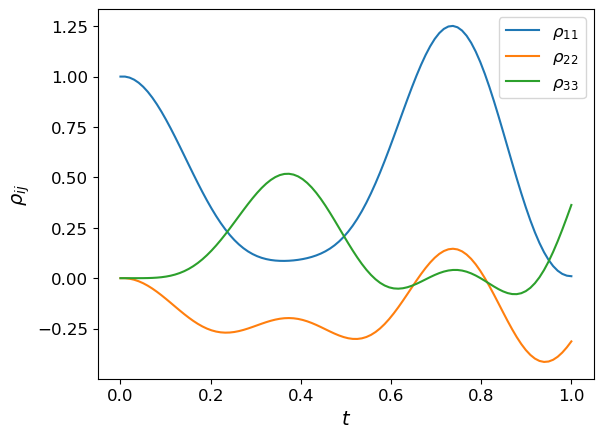

In [81]:
plt.plot(t, p_vals.T[0, 0], label='$\\rho_{11}$')
plt.plot(t, p_vals.T[0, 3], label='$\\rho_{22}$')
plt.plot(t, p_vals.T[0, 8], label='$\\rho_{33}$')
#plt.plot(t, p_vals.T[0, 0]+p_vals.T[0, 3]+p_vals.T[0,8], color='k')
plt.xlabel("$t$")
plt.ylabel("$\\rho_{ij}$")
plt.legend()

We want to see if we can extend the steady state calculation to this 3 level case as well.

In [82]:
# Define identity matrix
iden = sym.eye(3)

# Define 'vectorized' version of liouvillian
A = γ12 * sym.tensorproduct(σ12, σ12.conjugate())
B = γ23 * sym.tensorproduct(σ23, σ23.conjugate())
C = γ12 / 2 * (sym.tensorproduct(σ12.H @ σ12, iden) + sym.tensorproduct(iden, (σ12.H @ σ12).T))
D = γ23 / 2 * (sym.tensorproduct(σ23.H @ σ23, iden) + sym.tensorproduct(iden, (σ23.H @ σ23).T))
L = -1j * (sym.tensorproduct(H, iden) - sym.tensorproduct(iden, H.T)) + A - C + B - D 

In [83]:
L

[[[[0, 1.0*I*Ω_2_1, 0], [1.0*I*Ω_1_2, -γ_1_2/2 - 1.0*I*(ω_1 - ω_2), 1.0*I*Ω_3_2], [0, 1.0*I*Ω_2_3, -γ_2_3/2 - 1.0*I*(ω_1 - ω_3)]], [[-1.0*I*Ω_1_2, γ_1_2, 0], [0, -1.0*I*Ω_1_2, 0], [0, 0, -1.0*I*Ω_1_2]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[-1.0*I*Ω_2_1, 0, 0], [0, -1.0*I*Ω_2_1, 0], [0, 0, -1.0*I*Ω_2_1]], [[-γ_1_2/2 - 1.0*I*(-ω_1 + ω_2), 1.0*I*Ω_2_1, 0], [1.0*I*Ω_1_2, -γ_1_2, 1.0*I*Ω_3_2], [0, 1.0*I*Ω_2_3, -γ_1_2/2 - γ_2_3/2 - 1.0*I*(ω_2 - ω_3)]], [[-1.0*I*Ω_2_3, 0, 0], [0, -1.0*I*Ω_2_3, γ_2_3], [0, 0, -1.0*I*Ω_2_3]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[-1.0*I*Ω_3_2, 0, 0], [0, -1.0*I*Ω_3_2, 0], [0, 0, -1.0*I*Ω_3_2]], [[-γ_2_3/2 - 1.0*I*(-ω_1 + ω_3), 1.0*I*Ω_2_1, 0], [1.0*I*Ω_1_2, -γ_1_2/2 - γ_2_3/2 - 1.0*I*(-ω_2 + ω_3), 1.0*I*Ω_3_2], [0, 1.0*I*Ω_2_3, -γ_2_3]]]]

In [84]:
dum = sym.permutedims(L, (1, 0, 2, 3))
dum

[[[[0, 1.0*I*Ω_2_1, 0], [1.0*I*Ω_1_2, -γ_1_2/2 - 1.0*I*(ω_1 - ω_2), 1.0*I*Ω_3_2], [0, 1.0*I*Ω_2_3, -γ_2_3/2 - 1.0*I*(ω_1 - ω_3)]], [[-1.0*I*Ω_2_1, 0, 0], [0, -1.0*I*Ω_2_1, 0], [0, 0, -1.0*I*Ω_2_1]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[-1.0*I*Ω_1_2, γ_1_2, 0], [0, -1.0*I*Ω_1_2, 0], [0, 0, -1.0*I*Ω_1_2]], [[-γ_1_2/2 - 1.0*I*(-ω_1 + ω_2), 1.0*I*Ω_2_1, 0], [1.0*I*Ω_1_2, -γ_1_2, 1.0*I*Ω_3_2], [0, 1.0*I*Ω_2_3, -γ_1_2/2 - γ_2_3/2 - 1.0*I*(ω_2 - ω_3)]], [[-1.0*I*Ω_3_2, 0, 0], [0, -1.0*I*Ω_3_2, 0], [0, 0, -1.0*I*Ω_3_2]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[-1.0*I*Ω_2_3, 0, 0], [0, -1.0*I*Ω_2_3, γ_2_3], [0, 0, -1.0*I*Ω_2_3]], [[-γ_2_3/2 - 1.0*I*(-ω_1 + ω_3), 1.0*I*Ω_2_1, 0], [1.0*I*Ω_1_2, -γ_1_2/2 - γ_2_3/2 - 1.0*I*(-ω_2 + ω_3), 1.0*I*Ω_3_2], [0, 1.0*I*Ω_2_3, -γ_2_3]]]]

In [85]:
m

Matrix([
[           0,                  1.0*I*Ω_2_1,                            0,                  -1.0*I*Ω_1_2,        γ_1_2,                                      0,                             0,                                       0,            0],
[ 1.0*I*Ω_1_2, -γ_1_2/2 - 1.0*I*(ω_1 - ω_2),                  1.0*I*Ω_3_2,                             0, -1.0*I*Ω_1_2,                                      0,                             0,                                       0,            0],
[           0,                  1.0*I*Ω_2_3, -γ_2_3/2 - 1.0*I*(ω_1 - ω_3),                             0,            0,                           -1.0*I*Ω_1_2,                             0,                                       0,            0],
[-1.0*I*Ω_2_1,                            0,                            0, -γ_1_2/2 - 1.0*I*(-ω_1 + ω_2),  1.0*I*Ω_2_1,                                      0,                  -1.0*I*Ω_2_3,                                       0,            0],
[  

In [86]:
test = []
for i in range(3):
    for j in range(3):
        temp = []
        for k in range(3):
            for l in range(3):
                temp.append(dum[k][i][j][l])
        test.append(temp)
m = sym.Matrix(test)
a = m @ ρ.reshape(9, 1)
a

Matrix([
[                                                                        1.0*I*p_1_2*Ω_2_1 - 1.0*I*p_2_1*Ω_1_2 + p_2_2*γ_1_2],
[                           1.0*I*p_1_1*Ω_1_2 + p_1_2*(-γ_1_2/2 - 1.0*I*(ω_1 - ω_2)) + 1.0*I*p_1_3*Ω_3_2 - 1.0*I*p_2_2*Ω_1_2],
[                                               1.0*I*p_1_2*Ω_2_3 + p_1_3*(-γ_2_3/2 - 1.0*I*(ω_1 - ω_3)) - 1.0*I*p_2_3*Ω_1_2],
[                         -1.0*I*p_1_1*Ω_2_1 + p_2_1*(-γ_1_2/2 - 1.0*I*(-ω_1 + ω_2)) + 1.0*I*p_2_2*Ω_2_1 - 1.0*I*p_3_1*Ω_2_3],
[  -1.0*I*p_1_2*Ω_2_1 + 1.0*I*p_2_1*Ω_1_2 - p_2_2*γ_1_2 + 1.0*I*p_2_3*Ω_3_2 - 1.0*I*p_3_2*Ω_2_3 + γ_2_3*(-p_1_1 - p_2_2 + 1)],
[ -1.0*I*p_1_3*Ω_2_1 + 1.0*I*p_2_2*Ω_2_3 + p_2_3*(-γ_1_2/2 - γ_2_3/2 - 1.0*I*(ω_2 - ω_3)) - 1.0*I*Ω_2_3*(-p_1_1 - p_2_2 + 1)],
[                                             -1.0*I*p_2_1*Ω_3_2 + p_3_1*(-γ_2_3/2 - 1.0*I*(-ω_1 + ω_3)) + 1.0*I*p_3_2*Ω_2_1],
[-1.0*I*p_2_2*Ω_3_2 + 1.0*I*p_3_1*Ω_1_2 + p_3_2*(-γ_1_2/2 - γ_2_3/2 - 1.0*I*(-ω_2 + ω_3)) + 1.0*I*Ω_3_

In [87]:
b = dρ.reshape(9, 1)
b

Matrix([
[                                                                           p_2_2*γ_1_2 - 1.0*I*(-p_1_2*Ω_2_1 + p_2_1*Ω_1_2)],
[                                -0.5*p_1_2*γ_1_2 - 1.0*I*(-p_1_1*Ω_1_2 + p_1_2*ω_1 - p_1_2*ω_2 - p_1_3*Ω_3_2 + p_2_2*Ω_1_2)],
[                                              -0.5*p_1_3*γ_2_3 - 1.0*I*(-p_1_2*Ω_2_3 + p_1_3*ω_1 - p_1_3*ω_3 + p_2_3*Ω_1_2)],
[                                 -0.5*p_2_1*γ_1_2 - 1.0*I*(p_1_1*Ω_2_1 - p_2_1*ω_1 + p_2_1*ω_2 - p_2_2*Ω_2_1 + p_3_1*Ω_2_3)],
[              -1.0*p_2_2*γ_1_2 + γ_2_3*(-p_1_1 - p_2_2 + 1) - 1.0*I*(p_1_2*Ω_2_1 - p_2_1*Ω_1_2 - p_2_3*Ω_3_2 + p_3_2*Ω_2_3)],
[-0.5*p_2_3*γ_1_2 - 0.5*p_2_3*γ_2_3 - 1.0*I*(p_1_3*Ω_2_1 - p_2_2*Ω_2_3 + p_2_3*ω_2 - p_2_3*ω_3 + Ω_2_3*(-p_1_1 - p_2_2 + 1))],
[                                               -0.5*p_3_1*γ_2_3 - 1.0*I*(p_2_1*Ω_3_2 - p_3_1*ω_1 + p_3_1*ω_3 - p_3_2*Ω_2_1)],
[-0.5*p_3_2*γ_1_2 - 0.5*p_3_2*γ_2_3 - 1.0*I*(p_2_2*Ω_3_2 - p_3_1*Ω_1_2 - p_3_2*ω_2 + p_3_2*ω_3 - Ω_3_2

In [88]:
sym.simplify(a - b)

Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

In [90]:
# Now diagonalize m
m_fun = sym.lambdify(p_sym_list + h_sym_list + γ_sym_list, m)

m_val = m_fun(1, 0, 0, 0, 0, 0, 0, 0, 0, ω1_val, ω2_val, ω3_val, Ω12_val, Ω21_val, Ω23_val, Ω32_val, γ12_val, γ23_val)
eigs = np.linalg.eig(m_val)
eigs[0]

array([ 0.00000000e+00-1.73205081e+01j,  3.55444840e-15-8.66025404e+00j,
       -9.28004108e-16-5.08533827e-15j, -2.66159860e-15+1.73205081e+01j,
       -2.62678046e-16+8.66025404e+00j,  8.88178420e-16-8.66025404e+00j,
        2.22044605e-16+8.66025404e+00j, -2.88382265e-16+1.00208919e-16j,
        1.14783261e-15+1.32859485e-16j])

In [92]:
# It looks like the 3rd, 8th, and 9th eigenvalues are basically 0
print("3rd eigenvector check: ", m_val @ eigs[1][:, 2])
print("")
print("8th eigenvector check: ", m_val @ eigs[1][:, 7])
print("")
print("9th eigenvector check: ", m_val @ eigs[1][:, 8])

3rd eigenvector check:  [-1.87392501e-15-1.55431223e-15j -3.42437383e-15-2.66453526e-15j
 -1.22370299e-15-3.87029354e-15j  1.84374655e-15+8.88178420e-16j
  8.98507237e-16+1.77635684e-15j  5.09754395e-16+2.88657986e-15j
  9.11791209e-16+1.78676427e-15j -1.77846989e-15-2.22044605e-15j
  9.75417769e-16-2.22044605e-16j]

8th eigenvector check:  [ 0.00000000e+00-2.22044605e-16j -4.44089210e-16-8.88178420e-16j
 -7.21644966e-16-1.77635684e-15j -1.11022302e-16+2.22044605e-16j
  3.78168095e-16-4.44089210e-16j -4.44089210e-16+1.11022302e-15j
 -7.21644966e-16+8.88178420e-16j  1.38777878e-15-1.11022302e-15j
 -3.78168095e-16+4.44089210e-16j]

9th eigenvector check:  [ 0.00000000e+00+0.00000000e+00j  3.88578059e-16+2.22044605e-16j
 -4.44089210e-16-4.44089210e-16j  4.44089210e-16-4.44089210e-16j
  1.22124533e-15+6.66133815e-16j -6.66133815e-16+0.00000000e+00j
  7.77156117e-16-5.55111512e-16j  1.05471187e-15+8.88178420e-16j
 -1.22124533e-15-6.66133815e-16j]


## 4 Level Case

In [25]:
pgg, pgi, pg1, pg2, pig, pii, pi1, pi2, p1g, p1i, p11, p12, p2g, p2i, p21, p22 = sym.symbols("p_g_g, p_g_i, p_g_1, p_g_2, p_i_g, p_i_i, p_i_1, p_i_2, p_1_g, p_1_i, p_1_1, p_1_2, p_2_g, p_2_i, p_2_1, p_2_2")
p_sym_list = [pgg, pgi, pg1, pg2, pig, pii, pi1, pi2, p1g, p1i, p11, p12, p2g, p2i, p21, p22]
hgg, hgi, hig, hii, hi1, h1i, h11, h12, h21, h22 = sym.symbols("h_g_g, h_g_i, h_i_g, h_i_i, h_i_1, h_1_i, h_1_1, h_1_2, h_2_1, h_2_2")
h_sym_list = [hgg, hgi, hig, hii, hi1, h1i, h11, h12, h21, h22]

In [26]:
p = sym.Matrix([[pgg, pgi, pg1, pg2], [pig, pii, pi1, pi2], [p1g, p1i, p11, p12], [p2g, p2i, p21, p22]])
H = sym.Matrix([[hgg, hgi, 0, 0], [hig, hii, hi1, 0], [0, h1i, h11, h12], [0, 0, h21, h22]])

In [27]:
σgi = np.array([[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
σi1 = np.array([[0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
σ12 = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0]])

In [28]:
γgi, γi1, γ12 = sym.symbols("γ_g_i, γ_i_1, γ_1_2")
γ_sym_list = [γgi, γi1, γ12 ]

In [29]:
A = σgi @ p @ σgi.conj().T - γgi / 2 * (σgi.conj().T @ σgi @ p + p @ σgi.conj().T @ σgi)
A

Matrix([
[         p_i_i, -p_g_i*γ_g_i/2,              0,              0],
[-p_i_g*γ_g_i/2,   -p_i_i*γ_g_i, -p_i_1*γ_g_i/2, -p_i_2*γ_g_i/2],
[             0, -p_1_i*γ_g_i/2,              0,              0],
[             0, -p_2_i*γ_g_i/2,              0,              0]])

In [30]:
B = σi1 @ p @ σi1.conj().T - γi1 / 2 * (σi1.conj().T @ σi1 @ p + p @ σi1.conj().T @ σi1)
B

Matrix([
[             0,              0, -p_g_1*γ_i_1/2,              0],
[             0,          p_1_1, -p_i_1*γ_i_1/2,              0],
[-p_1_g*γ_i_1/2, -p_1_i*γ_i_1/2,   -p_1_1*γ_i_1, -p_1_2*γ_i_1/2],
[             0,              0, -p_2_1*γ_i_1/2,              0]])

In [31]:
C = σ12 @ p @ σ12.conj().T - γ12 / 2 * (σ12.conj().T @ σ12 @ p + p @ σ12.conj().T @ σ12)
C

Matrix([
[             0,              0,              0, -p_g_2*γ_1_2/2],
[             0,              0,              0, -p_i_2*γ_1_2/2],
[             0,              0,          p_2_2, -p_1_2*γ_1_2/2],
[-p_2_g*γ_1_2/2, -p_2_i*γ_1_2/2, -p_2_1*γ_1_2/2,   -p_2_2*γ_1_2]])

In [32]:
dρ = -1j * (p @ H - H @ p) + A + B + C
dρ

Matrix([
[                                                   p_i_i + 1.0*I*(-h_g_i*p_i_g + h_i_g*p_g_i),                                -p_g_i*γ_g_i/2 + 1.0*I*(h_1_i*p_g_1 - h_g_g*p_g_i + h_g_i*p_g_g - h_g_i*p_i_i + h_i_i*p_g_i),                               -p_g_1*γ_i_1/2 + 1.0*I*(h_1_1*p_g_1 + h_2_1*p_g_2 - h_g_g*p_g_1 - h_g_i*p_i_1 + h_i_1*p_g_i),                                -p_g_2*γ_1_2/2 + 1.0*I*(h_1_2*p_g_1 + h_2_2*p_g_2 - h_g_g*p_g_2 - h_g_i*p_i_2)],
[ -p_i_g*γ_g_i/2 + 1.0*I*(h_g_g*p_i_g - h_i_1*p_1_g - h_i_g*p_g_g + h_i_g*p_i_i - h_i_i*p_i_g),                                         p_1_1 - p_i_i*γ_g_i + 1.0*I*(h_1_i*p_i_1 + h_g_i*p_i_g - h_i_1*p_1_i - h_i_g*p_g_i), -p_i_1*γ_g_i/2 - p_i_1*γ_i_1/2 + 1.0*I*(h_1_1*p_i_1 + h_2_1*p_i_2 - h_i_1*p_1_1 + h_i_1*p_i_i - h_i_g*p_g_1 - h_i_i*p_i_1),  -p_i_2*γ_1_2/2 - p_i_2*γ_g_i/2 + 1.0*I*(h_1_2*p_i_1 + h_2_2*p_i_2 - h_i_1*p_1_2 - h_i_g*p_g_2 - h_i_i*p_i_2)],
[-p_1_g*γ_i_1/2 + 1.0*I*(-h_1_1*p_1_g - h_1_2*p_2_g - h_1_i*p_i_g + h_g_g*p_1

In [33]:
dρ_vec = dρ.reshape(16, 1)
dρ

Matrix([
[                                                   p_i_i + 1.0*I*(-h_g_i*p_i_g + h_i_g*p_g_i),                                -p_g_i*γ_g_i/2 + 1.0*I*(h_1_i*p_g_1 - h_g_g*p_g_i + h_g_i*p_g_g - h_g_i*p_i_i + h_i_i*p_g_i),                               -p_g_1*γ_i_1/2 + 1.0*I*(h_1_1*p_g_1 + h_2_1*p_g_2 - h_g_g*p_g_1 - h_g_i*p_i_1 + h_i_1*p_g_i),                                -p_g_2*γ_1_2/2 + 1.0*I*(h_1_2*p_g_1 + h_2_2*p_g_2 - h_g_g*p_g_2 - h_g_i*p_i_2)],
[ -p_i_g*γ_g_i/2 + 1.0*I*(h_g_g*p_i_g - h_i_1*p_1_g - h_i_g*p_g_g + h_i_g*p_i_i - h_i_i*p_i_g),                                         p_1_1 - p_i_i*γ_g_i + 1.0*I*(h_1_i*p_i_1 + h_g_i*p_i_g - h_i_1*p_1_i - h_i_g*p_g_i), -p_i_1*γ_g_i/2 - p_i_1*γ_i_1/2 + 1.0*I*(h_1_1*p_i_1 + h_2_1*p_i_2 - h_i_1*p_1_1 + h_i_1*p_i_i - h_i_g*p_g_1 - h_i_i*p_i_1),  -p_i_2*γ_1_2/2 - p_i_2*γ_g_i/2 + 1.0*I*(h_1_2*p_i_1 + h_2_2*p_i_2 - h_i_1*p_1_2 - h_i_g*p_g_2 - h_i_i*p_i_2)],
[-p_1_g*γ_i_1/2 + 1.0*I*(-h_1_1*p_1_g - h_1_2*p_2_g - h_1_i*p_i_g + h_g_g*p_1

In [34]:
# We can also turn the symbolic expressions into numerical ones using lambdify
dp_rhs = sym.lambdify(p_sym_list + h_sym_list + γ_sym_list, dρ_vec)

In [35]:
# Then we can use the Euler method to get an approximate solution to the derivative
# Define time range
t, dt = np.linspace(0, 1, 100, retstep=True)

# Define starting parameters - we'll assume we start entirely in the ground state
p_iv = np.zeros(16, dtype=complex)
p_iv[0] = 1
p_iv = p_iv.reshape(16, 1)
ω1_val = 10
ω2_val = 15
ω3_val = 20
ω4_val = 25
γ12_val = 0
γ23_val = 0
γ34_val = 0
Ω12_val = 5
Ω21_val = Ω12_val
Ω23_val = 5
Ω32_val = Ω23_val
Ω34_val= 5
Ω43_val = Ω34_val

In [36]:
# Now apply Euler method
p_vals = np.zeros((t.shape[0], 16, 1), dtype=complex)
p_curr = p_iv.copy()
for i in range(t.shape[0]):
    p_vals[i] = p_curr
    p_next = p_curr + dt * dp_rhs(p_vals[i, 0, 0], p_vals[i, 1, 0], p_vals[i, 2, 0], p_vals[i, 3, 0], p_vals[i, 4, 0],
                                  p_vals[i, 5, 0], p_vals[i, 6, 0], p_vals[i, 7, 0], p_vals[i, 8, 0], p_vals[i, 9, 0],
                                  p_vals[i, 10, 0], p_vals[i, 11, 0], p_vals[i, 12, 0], p_vals[i, 13, 0], p_vals[i, 14, 0],
                                  p_vals[i, 15, 0], ω1_val, ω2_val, ω3_val, ω4_val,
                                  Ω12_val, Ω21_val, Ω23_val, Ω32_val, Ω34_val, Ω43_val, γ12_val, γ23_val, γ34_val)
    p_curr = p_next

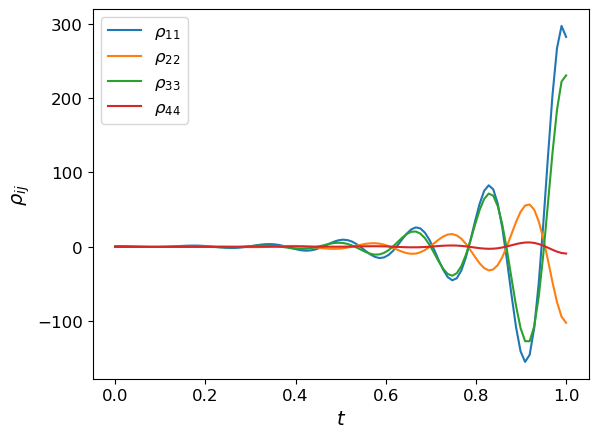

In [37]:
plt.plot(t, p_vals.T[0, 0], label='$\\rho_{11}$')
plt.plot(t, p_vals.T[0, 3], label='$\\rho_{22}$')
plt.plot(t, p_vals.T[0, 8], label='$\\rho_{33}$')
plt.plot(t, p_vals.T[0, 15], label='$\\rho_{44}$')
#plt.plot(t, p_vals.T[0, 0]+p_vals.T[0, 3]+p_vals.T[0,8], color='k')
plt.xlabel("$t$")
plt.ylabel("$\\rho_{ij}$")
plt.legend()